In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
data_train=pd.read_csv("../dataset/train.csv")
data_test=pd.read_csv("../dataset/test.csv")
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
constant_filter.fit(data_train)  

NameError: name 'constant_filter' is not defined

In [10]:
#Avaliando variáveis com missing
data_train_mis = (data_train.isnull().sum() / len(data_train)) * 100
data_train_mis = data_train_mis.drop(data_train_mis[data_train_mis == 0].index).sort_values(ascending=False)
data_train_mis.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [11]:
#Dropando variáveis com mais de 50% de Missing
data_train.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1,inplace=True)
data_test.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1,inplace=True)


In [12]:
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
#Tratamento das variáveis missings - inputs diretos de valor correspondente

for col in ('FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType'):
    data_train[col] = data_train[col].fillna('None')
    data_test[col] = data_test[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    data_train[col] = data_train[col].fillna(0)
    data_test[col] = data_test[col].fillna(0)


In [14]:
#Preenchimento de Missings com a mediana

data_train["LotFrontage"] = data_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

data_test["LotFrontage"] = data_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Preenchendo Missings com valor mais comum
data_train['Electrical'] = data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])
data_test['Electrical'] = data_test['Electrical'].fillna(data_test['Electrical'].mode()[0])

#Avaliando variáveis com missing
data_train_mis = (data_train.isnull().sum() / len(data_train)) * 100
data_train_mis = data_train_mis.drop(data_train_mis[data_train_mis == 0].index).sort_values(ascending=False)
data_train_mis.head(20)

Series([], dtype: float64)

In [58]:
#Drop de variáveis específicas identificadas durante analise descritiva

#Todos estão com mesmo valor, pouco poder discriminativo
data_train.drop(['Utilities'], axis=1,inplace=True)
data_test.drop(['Utilities'], axis=1,inplace=True)

#Quase 100% dos casos possuem Y
data_train.drop(['CentralAir'], axis=1,inplace=True)
data_test.drop(['CentralAir'], axis=1,inplace=True)

#Muito Correlacionada com GarageCars
data_train.drop(['GarageArea'], axis=1,inplace=True)
data_test.drop(['GarageArea'], axis=1,inplace=True)

#Muito Correlacionada com TotalBsmtSF
data_train.drop(['1stFlrSF'], axis=1,inplace=True)
data_test.drop(['1stFlrSF'], axis=1,inplace=True)

#Muito Correlacionada com GrLivArea
data_train.drop(['TotRmsAbvGrd'], axis=1,inplace=True)
data_test.drop(['TotRmsAbvGrd'], axis=1,inplace=True)

data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
onehot_encoder = OneHotEncoder(sparse=False)
encoder = preprocessing.OneHotEncoder()

In [16]:
data_train_c = data_train.copy()
cats = []
for col in data_train_c.columns:
    if data_train_c[col].dtype == object:
        data_train_c = data_train_c.join(pd.get_dummies(data_train_c[col], prefix=col), how='left')
        data_train_c.drop(col, axis=1, inplace=True)
    

print('Dims', data_train_c.shape)
data_train_c.fillna(-1, inplace=True)

Dims (1460, 287)


In [17]:
data_test_c = data_test.copy()
cats = []
for col in data_test_c.columns:
    if data_test_c[col].dtype == object:
        data_test_c = data_test_c.join(pd.get_dummies(data_test_c[col], prefix=col), how='left')
        data_test_c.drop(col, axis=1, inplace=True)
    

print('Dims', data_test_c.shape)
data_test_c.fillna(-1, inplace=True)

Dims (1459, 270)


In [62]:
data_train_c.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data_test_c.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.955106,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,421.321334,42.746880,20.999091,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2190.000000,50.000000,70.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data = data_train_c

In [20]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
print(data.shape)

(1460, 287)


In [22]:
datax=data

In [23]:
data.drop(['Id'],axis=1,inplace=True)

In [24]:
y=data['SalePrice']

In [25]:
datax.drop(['SalePrice'],axis=1,inplace=True)

In [26]:
X , y = datax , y

In [27]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/edhirama/.virtualenvs/python3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/edhirama/.virtualenvs/python3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [30]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [31]:
preds = xg_reg.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78971.423176


In [33]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [34]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,178902.968750,659.084701,179017.890625,1349.634351
1,162165.473958,631.172071,162704.515625,1274.715735
2,147070.088542,515.810705,147758.781250,1225.964112
3,133561.505208,401.069474,134523.708333,1286.404492
4,121293.497396,324.674392,122502.484375,1467.516083


In [35]:
print((cv_results["test-rmse-mean"]).tail(1))

49    28485.520182
Name: test-rmse-mean, dtype: float64


In [36]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

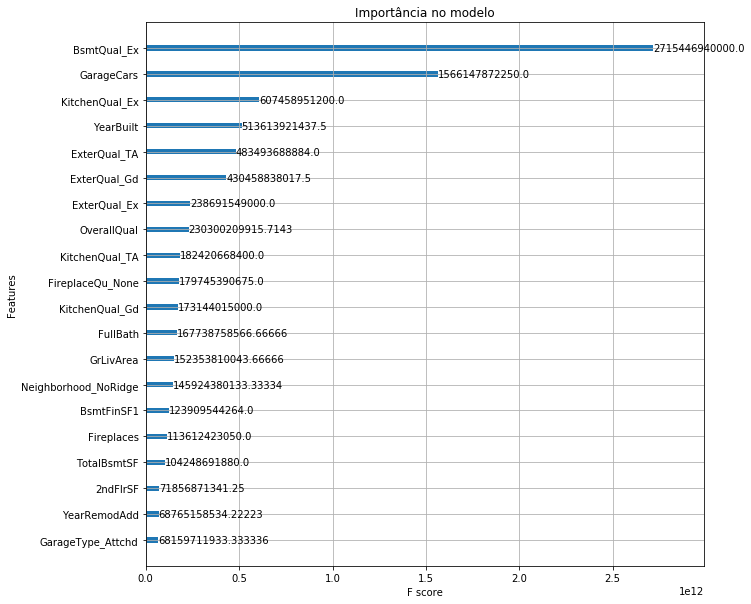

In [122]:
xgb.plot_importance(xg_reg, importance_type = 'gain' ,max_num_features = 20,title = 'Importância no modelo')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

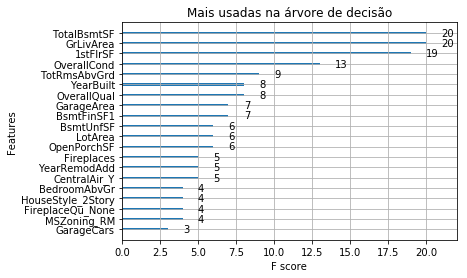

In [37]:
xgb.plot_importance(xg_reg ,max_num_features = 20,title ='Mais usadas na árvore de decisão')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

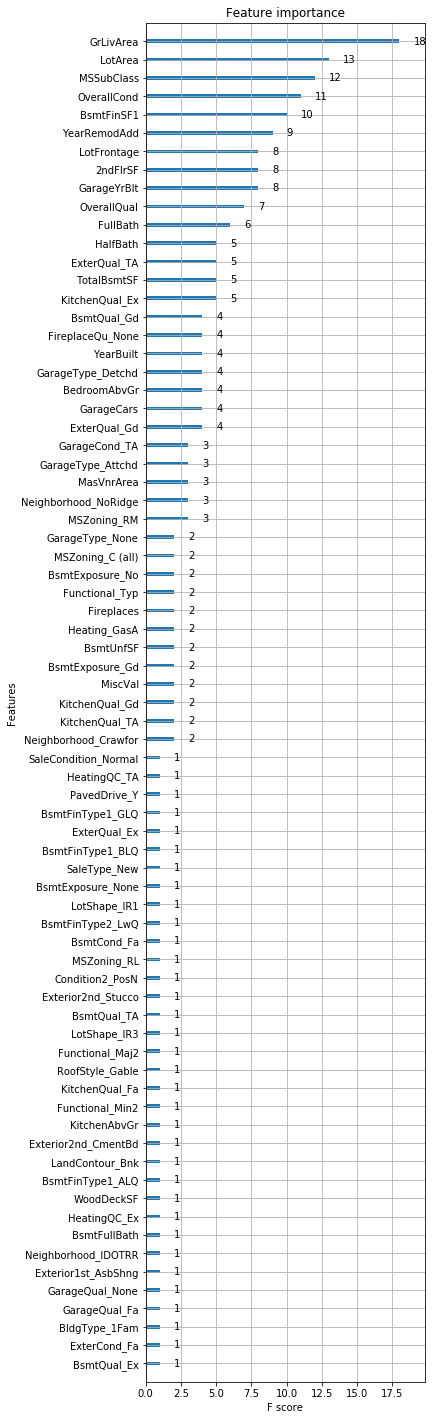

In [137]:
xgb.plot_importance(xg_reg )
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [95]:
help(xg_reg)

Help on Booster in module xgboost.core object:

class Booster(builtins.object)
 |  Booster(params=None, cache=(), model_file=None)
 |  
 |  A Booster of XGBoost.
 |  
 |  Booster is the model of xgboost, that contains low level routines for
 |  training, prediction and evaluation.
 |  
 |  Methods defined here:
 |  
 |  __copy__(self)
 |  
 |  __deepcopy__(self, _)
 |  
 |  __del__(self)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, params=None, cache=(), model_file=None)
 |      Parameters
 |      ----------
 |      params : dict
 |          Parameters for boosters.
 |      cache : list
 |          List of cache items.
 |      model_file : string
 |          Path to the model file.
 |  
 |  __setstate__(self, state)
 |  
 |  attr(self, key)
 |      Get attribute string from the Booster.
 |      
 |      Parameters
 |      ----------
 |      key : str
 |          The key to get attribute from.
 |      
 |      Returns
 |      -------
 |      value : str
 |          The attribute 

In [98]:
help(xgb.plot_importance)

Help on function plot_importance in module xgboost.plotting:

plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)
    Plot importance based on fitted trees.
    
    Parameters
    ----------
    booster : Booster, XGBModel or dict
        Booster or XGBModel instance, or dict taken by Booster.get_fscore()
    ax : matplotlib Axes, default None
        Target axes instance. If None, new figure and axes will be created.
    grid : bool, Turn the axes grids on or off.  Default is True (On).
    importance_type : str, default "weight"
        How the importance is calculated: either "weight", "gain", or "cover"
    
        * "weight" is the number of times a feature appears in a tree
        * "gain" is the average gain of splits which use the feature
        * "cover" is the average coverage of splits which use the featu